<a href="https://colab.research.google.com/github/ZiyueNie/19ma573ZiyueNie/blob/master/src/hw5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Desgin a python function pi_mc(N, m) with
  - Input: Two integer numbers $N$ and $m$
  - Output: An array of length $m$, where all componets are independent, and computed from ordinary monte carlo method for $\pi$ with $N$ simulations (random shots).
- For $N \in \{2^n: n = 5, \ldots, 10\}$: Run pi_mc(N, 100) and find its variance
- Plot log-log chart for $N \to RMSE(N)$ using the array above and find convergence rate
- Can you propose a deterministic approximation to $\pi$?

In [0]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('talk')

In [0]:
def pi_mc(N,m):
#area of the bounding box
  box_area = 4.0    

#number of samples
  N_total = N
  array = []

#drawing random points uniform between -1 and 1
  for i in range(m):
    X = np.random.uniform(low=-1, high=1, size=N_total)  
    Y = np.random.uniform(low=-1, high=1, size=N_total)   

# calculate the distance of the point from the center 
    distance = np.sqrt(X**2+Y**2);  
 
# check if point is inside the circle    
    is_point_inside = distance<1.0

# sum up the hits inside the circle
    N_inside=np.sum(is_point_inside)

# estimate the circle area
    circle_area = box_area * N_inside/N_total
    array.append(circle_area)
  return array

#array1=pi_mc(1000,10)
#print(array1)


Input two integer numbers  𝑁  and  𝑚 <br>
Output an array of length  𝑚 , where all componets are independent, and computed from ordinary monte carlo method for  𝜋  

In [116]:
N=int(input("input N:"))
m=int(input("input m:"))
array_1 = pi_mc(N,m)
print(array_1)


input N:1000
input m:10
[3.152, 3.048, 3.132, 3.0, 3.144, 3.084, 3.164, 3.18, 3.092, 3.136]


For  𝑁∈{2𝑛:𝑛=5,…,10} : Run pi_mc(N, 100) and find its variance

In [117]:
var=[]
for i in range(5,11):
  N=2**i
  array2=pi_mc(N,100)
  #print(array2)
  var_N=np.var(array2)
  var.append(var_N)
  print("Variance for N=2^" +str(i)+ " is " +str(var_N))

 


Variance for N=2^5 is 0.09632968750000001
Variance for N=2^6 is 0.054326171875000016
Variance for N=2^7 is 0.01787109375
Variance for N=2^8 is 0.0111496826171875
Variance for N=2^9 is 0.0054330810546874995
Variance for N=2^10 is 0.0024541305541992183


Plot log-log chart for  𝑁→𝑅𝑀𝑆𝐸(𝑁)  using the array above and find convergence rate

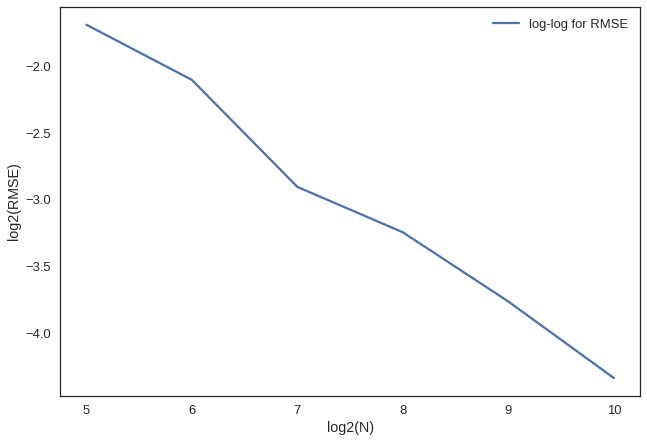

In [118]:
#print(var)
N=[2**i for i in range(5,11)]
xx=np.log2(N)
yy=np.log2(np.sqrt(var))
plt.plot(xx,yy,label="log-log for RMSE")
plt.xlabel("log2(N)")
plt.ylabel("log2(RMSE)")
plt.legend()

In [119]:
out = ss.linregress(xx,yy)
print('----->>>the convergence order is ' + str(-out[0]))

----->>>the convergence order is 0.5302788991521237


 propose a deterministic approximation to  𝜋
 <br>
 since $$\sum_{i=1}^\infty \frac{1}{n^2}=\frac{\pi^2}{6}$$
 then $$\pi=\sqrt{6\sum_{i=1}^\infty \frac{1}{n^2}}$$

In [0]:
def Pi_math(n):
  sum=0
  for i in range(1,n+1):
      sum += 1.0/(i*i)
  pi=np.sqrt(sum*6)
  return pi

In [121]:
n=int(input("input n:"))
pi=Pi_math(n)
print("approximation of pi is "+str(pi))

input n:100000
approximation of pi is 3.141583104326456
